## Plotting Intro


Gliderpy has a plotting interface for quick simple diagnostic figures they are: `plot_ track`, `plot_ctd`, and `plot_transect` for plotting the glider track, a vertical transect for a specific variable, or a single cast (glider dive). Let's take a look on how to use them. First we will load a glider dataset as a pandas DataFrame.

In [1]:
from gliderpy.fetchers import GliderDataFetcher

glider_grab = GliderDataFetcher()

glider_grab.fetcher.dataset_id = "whoi_406-20160902T1700"
df = glider_grab.to_pandas()

### plot_track

The `plot_track` method will returns a map with the glider's track.

/home/runner/micromamba/envs/TEST/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


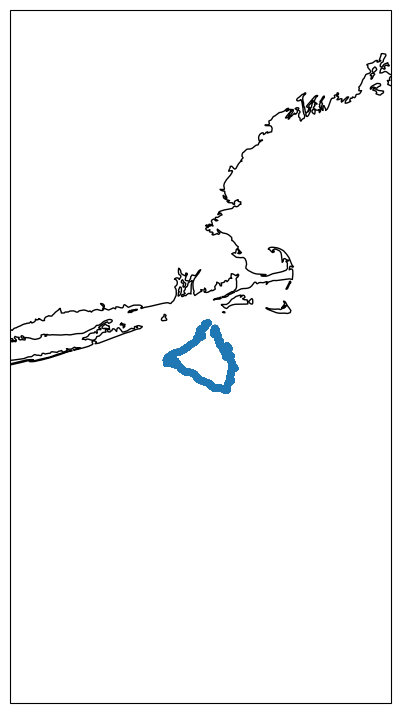

In [2]:
fig, ax = df.plot_track()

### plot_cast

This method groups all the casts by their position (latitude and longitude) giving the user access to each individual cast using the index (`profile_number`) of the grouped DataFrame.

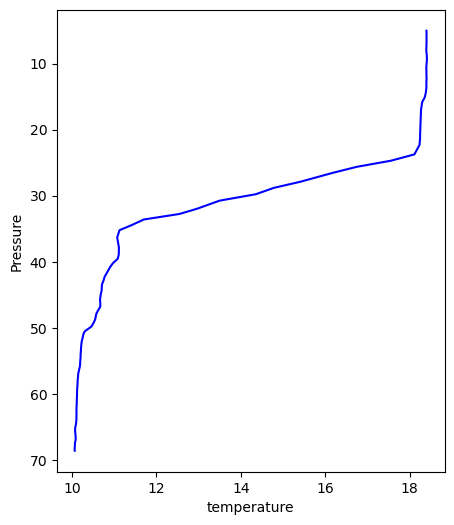

In [3]:
fig, ax = df.plot_cast(profile_number=0, var="temperature", color="blue")

All the methods accept and `ax` argument and more complex figures can be create. For example, let's add a second variable to the cast above.

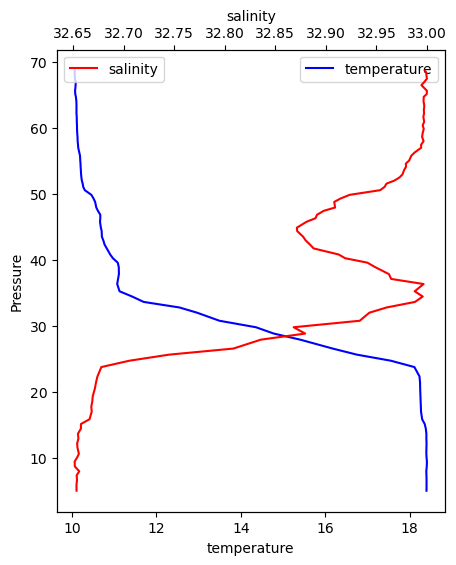

In [4]:
fig, ax0 = df.plot_cast(profile_number=0, var="temperature", color="blue")

ax1 = ax0.twiny()
df.plot_cast(profile_number=0, var="salinity", color="red", ax=ax1)

ax0.legend()
ax1.legend()

We can check a whole transec with the `plot_transect` method.

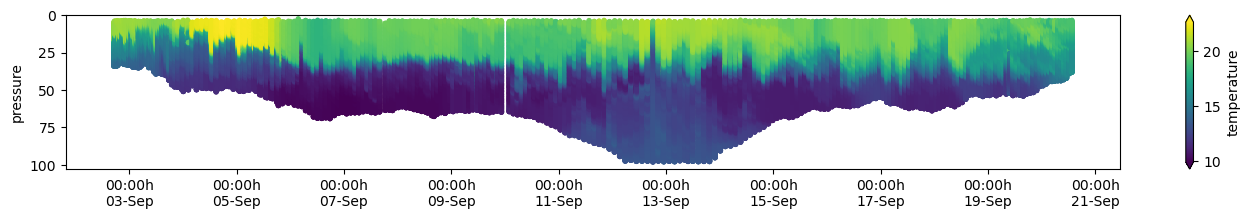

In [5]:
fig, ax = df.plot_transect(var="temperature", cmap="viridis")

Using a given matplotlib we can create a fancier version with two variables in a subplot.

(<Figure size 1500x900 with 4 Axes>, <Axes: ylabel='pressure'>)

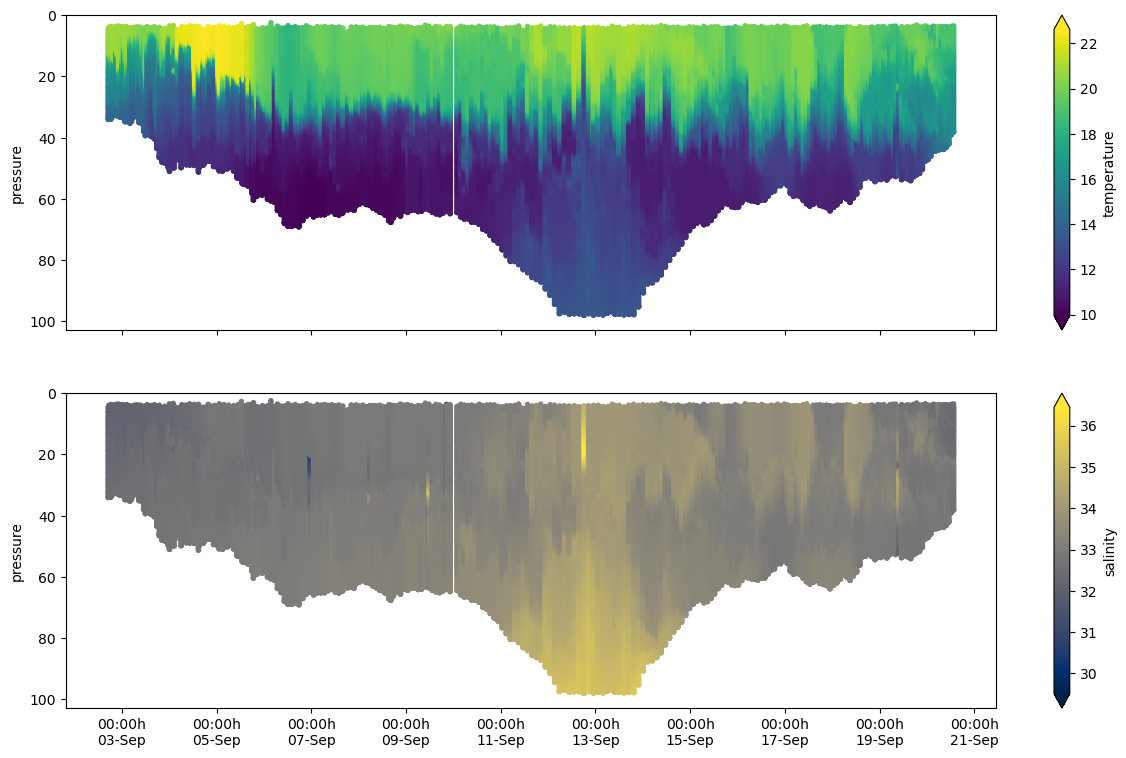

In [6]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(
    figsize=(15, 9),
    nrows=2,
    sharex=True,
    sharey=True,
)

df.plot_transect(var="temperature", ax=ax0, cmap="viridis")
df.plot_transect(var="salinity", ax=ax1, cmap="cividis")